In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

# 2D Heat Conduction in Wall Construction

In [8]:
# constants

# Conductivity ค่า k ของวัสดุ W/m.C
airk = 0.025 # Air
brickk = 0.473
mortark = 1.0
plasterk = 0.72
concretek = 1.44

# Specific Heat Capacity * Density kJ/kg.C * kg/m3 * 1000 = J/m3.K
# ค่า Cp ของวัสดุ
airCp = 1200 # Air # J/m3 K
brickCp = 1600*790 # J/m3 K
mortarCp = 1860*780 # J/m3 K
plasterCp = 1860*840 # J/m3 K
concreteCp = 2400*920 # J/m3 K

distance = .01 # 1cm
di = [[1,0],[0,1],[-1,0],[0,-1]]



In [3]:
outtemp = []
with open('./data/out_temp_21_22_June.txt', 'r') as readFile:
    for i in readFile:
        outtemp.append(float(i.strip('\n')))

In [2]:
#outtemp

In [9]:
# initialised
cells = np.full((100,40),outtemp[0],  dtype=float)
kcells = np.full((100,40),airk,  dtype=float)
Cpcells = np.full((100,40),airCp,  dtype=float)


def wallfloorbrick10():
    # Set Temp source
    for i in range(20,len(cells)):
        for h in range(1,10):
            kcells[i][h] = brickk
            Cpcells[i][h] = brickCp

    for i in range(25,len(cells),7):
        for h in range(1,10):
            kcells[i][h] = mortark
            Cpcells[i][h] = mortarCp

    for i in range(len(cells)):
        kcells[i][1:3] = plasterk
        Cpcells[i][1:3] = plasterCp
    for i in range(20,len(cells)):
        kcells[i][8:10] = plasterk
        Cpcells[i][8:10] = plasterCp
    
    for i in range(20):
        kcells[i][3:] = concretek
        Cpcells[i][3:] = concreteCp

def wallfloorcon20():
    # Set Temp source
    for i in range(20,len(cells)):
        for h in range(20):
            kcells[i][h] = concretek
            Cpcells[i][h] = concreteCp

    for i in range(20):
        kcells[i][:] = concretek
        Cpcells[i][:] = concreteCp
        
def wallfloorcon10():
    # Set Temp source
    for i in range(20,len(cells)):
        for h in range(20):
            kcells[i][h] = concretek
            Cpcells[i][h] = concreteCp

    for i in range(10):
        kcells[i][:] = concretek
        Cpcells[i][:] = concreteCp

temp = cells.copy()
mat = cells.copy()

ukcells= np.vstack(([i for i in kcells[0]], kcells[:-1]))
dkcells= np.vstack((kcells[1:], [i for i in kcells[0]], ))
lkcells= np.hstack(([[i[0]] for i in kcells], kcells[:, :-1]))
rkcells= np.hstack((kcells[:, 1:], [[i[-1]] for i in kcells]))

In [10]:
#Calculation Method
def conductivitybetweencell(cell, adjcell,k,adjk):
    return (adjcell-cell)*(distance/((distance/(2*adjk))+(distance/(2*k))))

def cond2d(cells,outtemp,intemp=25):
    #global cells
    ucells= np.vstack(([i for i in cells[0]], cells[:-1]))
    dcells= np.vstack((cells[1:], [i for i in cells[0]], ))
    lcells= np.hstack(([[outtemp] for i in cells], cells[:, :-1]))
    rcells= np.hstack((cells[:, 1:], [[i[-1]] for i in cells]))
    up = conductivitybetweencell(cells, ucells, kcells, ukcells)
    down = conductivitybetweencell(cells, dcells, kcells, dkcells)
    left = conductivitybetweencell(cells, lcells, kcells, lkcells)
    right = conductivitybetweencell(cells, rcells, kcells, rkcells)

    temp = cells  + (up+down+left+right)/(Cpcells*distance*distance)
    cells = temp.copy()
    return cells
    
# plot()
def plot2dcon(cells,title="",ot=None,it=None, save=False):
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111)
    ax.set_title("Wall Section OutdoorT = {} IndoorT = {}".format(ot,it)+title)
    p = [i[1:-1] for i in cells]
    cs = ax.contour(p, linewidths=0.5, colors= 'black',linestyles="dashed")
    ax.clabel(cs, inline=1, fontsize=10, colors = "black", fmt = "%0.1f", animated=True)
    ax.imshow(p,interpolation='bilinear', vmin = min(np.concatenate(p).ravel().tolist()), 
                vmax=max(np.concatenate(p).ravel().tolist()), animated=True)

    #wallfloor
    ax.add_patch(patches.Rectangle((-0.5,0-0.5),2,100,linewidth=1,edgecolor='black',facecolor='none'))
    ax.add_patch(patches.Rectangle((6.5,19.5),2,80,linewidth=1,edgecolor='black',facecolor='none'))
    ax.add_patch(patches.Rectangle((1.5,-0.5),40,20,linewidth=1,edgecolor='black',facecolor='none'))
    ax.add_patch(patches.Circle((9,60),1, facecolor="black"))
    for i in range(25,len(cells),7):
        ax.add_patch(patches.Rectangle((1.5,i-0.5),5,1,linewidth=1,edgecolor='black',facecolor='none'))

    #ax.imshow([i[1:-1] for i in kcells],interpolation='nearest',alpha=1) 
    if save:
        fig.savefig("Wall Section"+title)
        plt.close('all')
        
def plot2dconcon20(cells,title="",ot=None,it=None, save=False):
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111)
    ax.set_title("Wall Section OutdoorT = {} IndoorT = {}".format(ot,it)+title)
    p = [i[1:-1] for i in cells]
    cs = ax.contour(p, linewidths=0.5, colors= 'black',linestyles="dashed")
    ax.clabel(cs, inline=1, fontsize=10, colors = "black", fmt = "%0.1f", animated=True)
    ax.imshow(p,interpolation='bilinear', vmin = min(np.concatenate(p).ravel().tolist()), 
                vmax=max(np.concatenate(p).ravel().tolist()), animated=True)
    
    #wallfloor
    ax.add_patch(patches.Rectangle((-0.5,19.5),19,80,linewidth=1,edgecolor='black',facecolor='none'))
    ax.add_patch(patches.Rectangle((-0.5,-0.5),40,20,linewidth=1,edgecolor='black',facecolor='none'))
    ax.add_patch(patches.Circle((19,60),1, facecolor="black"))

    #ax.imshow([i[1:-1] for i in Cpcells],interpolation='nearest',alpha=1) 
    if save:
        fig.savefig("Wall Section"+title)
        plt.close('all')

In [11]:
wallfloorbrick10()
#wallfloorcon20()
bricktemp = []
intemp = [26 for i in outtemp]
hour = 0
brickcells = np.full((100,40),outtemp[0],  dtype=float)
for i,h in zip(outtemp, intemp):
    count = 0
    bricktemp.append(brickcells[60,9])
    while count < 3600:
        t = cond2d(brickcells,i)
        brickcells = t
        count+=1
    #plot2dcon(brickcells, 'Brick10 '+str(len(bricktemp)), i,bricktemp[-1], True)

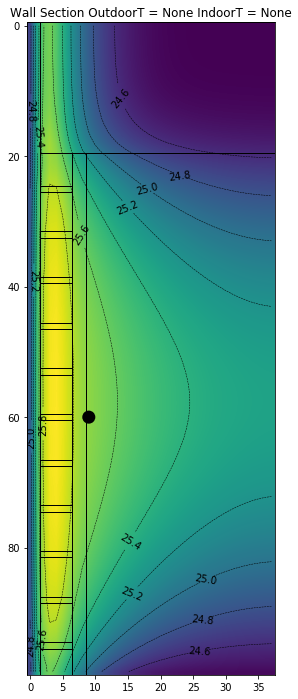

In [12]:
plot2dcon(brickcells)

In [1]:
#bricktemp

### Exercise

* ใช้อุณหภูมิภายนอกของวันที่ 21-22 ธันวาคม เป็นเวลา 48 ชั่วโมง
* สร้างกราฟเส้นที่แสดงอุภูมิภายนอกและพื้นผิวในกราฟเดียวกัน

## Solution

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
%matplotlib inline

In [16]:
day = 21
month = 12 #<--- โจทย์ข้อแรก เปลี่ยนเป็นเลข 12 ซึ่งก็คือเดือนธันวาคม
hour = 24*2

outtemp = []

def get_data_from_weather_file(day=1,month=1,hour=24):
    m = [31,28,31,30,31,30,31,31,30,31,30,31]
    h = (((day-1)*24)+(sum(m[:month-1])*24))

    bkk = "./data/THA_Bangkok.484560_IWEC.epw"
    with open(bkk, 'r') as EPWRead:
        lines = EPWRead.readlines()
        for text in lines[h+8:h+hour+8]:
            datalist = text.split(",")
            outtemp.append(float(datalist[6])) # 6 Dry Bulb Temperature
    #outtemp = yeartemp[h:h+hour]
get_data_from_weather_file(day,month,hour)

In [6]:
dti = pd.date_range('2018-12-21', periods=48, freq='H')

In [13]:
df = pd.DataFrame({'Out Temp.': outtemp, 'Surface Temp.': bricktemp}, index = dti)

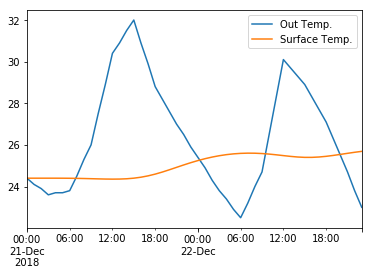

In [18]:
# โจทย์ข้อที่สอง
df.plot()

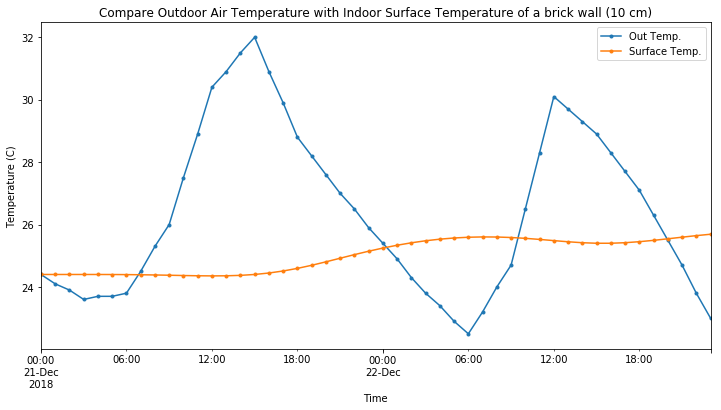

In [17]:
ax = df.plot(figsize=(12,6), title='Compare Outdoor Air Temperature with Indoor Surface Temperature of a brick wall (10 cm)', marker = '.')
ax.set(xlabel='Time', ylabel='Temperature (C)')
plt.show()